In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#import ptitprince
import seaborn as sns

In [2]:
fpath = '/home/hyruuk/GitHub/neuromod/shinobi_fmri/data/processed/ses-level_beta_maps_corrs.pkl'
with open(fpath, 'rb') as f:
    datadict = pickle.load(f)

condlist = np.unique(datadict['cond'])
subjlist = np.unique(datadict['subj'])
n_runs = len(datadict['fnames'])

corr_r2 = []
corr_cond = []
corr_intera = []

# Loop to get intra-subj R2
for cond in condlist:
    for subj in subjlist:
        for i in range(n_runs):
            for j in range(n_runs):
                if i<j:
                    if datadict['cond'][i] == cond and datadict['cond'][j] == cond:
                        if datadict['subj'][i] == subj and datadict['subj'][j] == subj:
                            corr_r2.append(datadict['corr_matrix'][i,j])
                            corr_cond.append(cond)
                            corr_intera.append('intra-subject')
                            

# Loop to get inter-subj R2
for cond in condlist:
    for subj in subjlist:
        for i in range(n_runs):
            for j in range(n_runs):
                if i<j:
                    if datadict['cond'][i] == cond and datadict['cond'][j] == cond:
                        if datadict['subj'][i] == subj and datadict['subj'][j] != subj:
                            corr_r2.append(datadict['corr_matrix'][i,j])
                            corr_cond.append(cond)
                            corr_intera.append('inter-subject')


# Loop to get intra-subj R2
for cond in condlist:
    for subj in subjlist:
        for i in range(n_runs):
            for j in range(n_runs):
                if i<j:
                    if datadict['cond'][i] == cond and datadict['cond'][j] != cond:
                        if datadict['subj'][i] == subj and datadict['subj'][j] == subj:
                            corr_r2.append(datadict['corr_matrix'][i,j])
                            corr_cond.append('Inter-annotations')
                            corr_intera.append('intra-subject')
                            

# Loop to get inter-subj R2
for cond in condlist:
    for subj in subjlist:
        for i in range(n_runs):
            for j in range(n_runs):
                if i<j:
                    if datadict['cond'][i] == cond and datadict['cond'][j] != cond:
                        if datadict['subj'][i] == subj and datadict['subj'][j] != subj:
                            corr_r2.append(datadict['corr_matrix'][i,j])
                            corr_cond.append('Inter-annotations')
                            corr_intera.append('inter-subject')

plot_df = pd.DataFrame({'r2':corr_r2,
                        'event': corr_cond,
                        'comparison': corr_intera})


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

intra-subject_Inter-annotations vs. intra-subject_JUMP: t-test independent samples with Bonferroni correction, P_val:5.994e-39 t=-1.339e+01
inter-subject_Inter-annotations vs. inter-subject_JUMP: t-test independent samples with Bonferroni correction, P_val:3.119e-33 t=-1.223e+01
intra-subject_Inter-annotations vs. intra-subject_HIT: t-test independent samples with Bonferroni correction, P_val:3.734e-128 t=-2.531e+01
inter-subject_Inter-annotations vs. inter-subject_HIT: t-test independent samples with Bonferroni correction, P_val:2.793e-141 t=-2.582e+01
inter-subject_Inter-annotations vs. inter-subject_Kill: t-test independent samples with Bonferroni correction, P_val:1.205e-147 t=-2.642e+01
intra-subject_Inter-annotations vs. intra-subject_Kill: t-test independent samples with Bonferroni correction, P_val:7

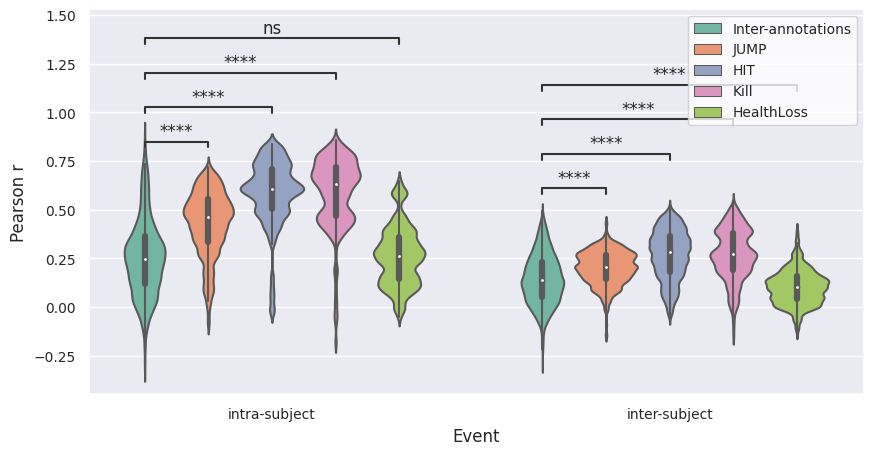

In [46]:
from statannotations.Annotator import Annotator

dx="comparison"; dy="r2"; dhue = "event"; ort="v"; pal = "Set2"; sigma = .15
hue_order = ['Inter-annotations', 'JUMP', 'HIT', 'Kill', 'HealthLoss']
f, ax = plt.subplots(figsize=(10,5))
sns.set(font_scale = 2)
sns.set_theme(style="whitegrid")

sns.violinplot(x = dx, y = dy, hue = dhue, 
               hue_order=hue_order,
               data = plot_df, palette = pal, bw = sigma,
               ax = ax, orient = ort, alpha = .65)

#ax.set_title('Correlations between beta maps', fontsize=14)
ax.set_xlabel('Event', fontsize=12)
ax.set_ylabel('Pearson r', fontsize=12)
ax.tick_params(axis = 'both', which = 'major', labelsize = 10)
plt.legend(loc='upper right')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:5], labels[:5], fontsize=10)



# Build the pairs
pairs = []
for comp in np.unique(plot_df.comparison):
    for event in np.unique(plot_df.event):
        if event != 'Inter-annotations':
            pairs.append(((comp, event), (comp, 'Inter-annotations')))

#pairs = [('Inter-annotations','JUMP')]
annotator = Annotator(ax, pairs, data=plot_df, x=dx, y=dy, hue=dhue, hue_order=hue_order)
annotator.configure(test='t-test_ind', text_format='star', loc='inside', comparisons_correction='bonf')
annotator.apply_and_annotate();

In [44]:
annotator._get_results(num_comparisons=10)

/home/hyruuk/mambaforge/envs/shinobi/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 7.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/hyruuk/mambaforge/envs/shinobi/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 7.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


KeyboardInterrupt: 

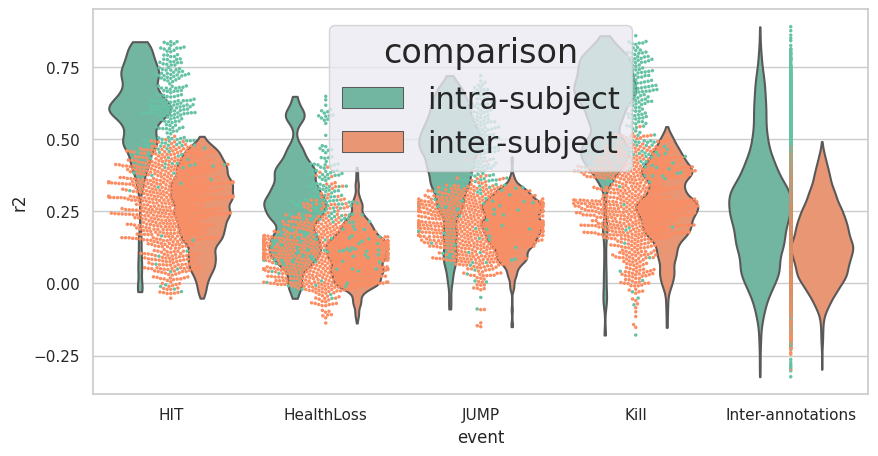

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

dx="event"; dy="r2"; dhue = "comparison"; ort="v"; pal = "Set2"; sigma = .15
f, ax = plt.subplots(figsize=(10,5))
sns.set(font_scale = 2)
sns.violinplot(x = dx, y = dy, hue = dhue, data = plot_df, palette = pal, inner = None, bw = sigma, scale="width", cut=0)
sns.swarmplot(x = dx, y = dy, hue = dhue, data = plot_df, palette = pal, size = 2.5)
ax.set_title('Correlations between beta maps', fontsize=18, fontweight='bold')
ax.set_xlabel('Event', fontsize=16)
ax.set_ylabel('Pearson r', fontsize=16)
ax.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.legend(loc='upper right')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:2], labels[:2], fontsize=14)

In [8]:
plot_df

,r2,event,comparison
0,0.301782,HIT,intra-subject
1,0.393304,HIT,intra-subject
2,0.342176,HIT,intra-subject
3,0.320611,HIT,intra-subject
4,-0.032222,HIT,intra-subject
...,...,...,...
2878,0.211409,Kill,inter-subject
2879,0.182633,Kill,inter-subject
2880,0.040448,Kill,inter-subject
2881,0.325242,Kill,inter-subject


Text(0, 0.5, 'Pearson r')

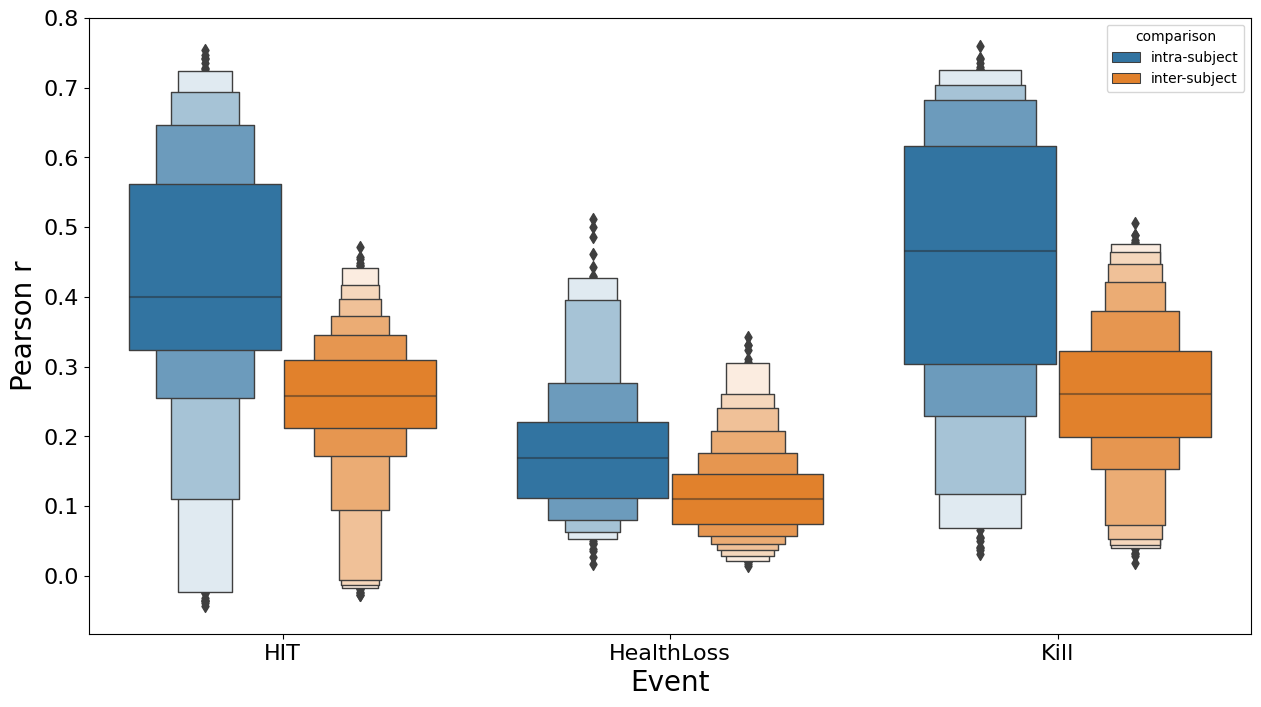

In [9]:
import seaborn as sbn
fig, ax = plt.subplots(figsize=(15,8))
sbn.boxenplot(data=plot_df, x='event', y='r2', hue='comparison', scale='area')
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
ax.set_xlabel('Event', fontsize=20)
ax.set_ylabel('Pearson r', fontsize=20)

/home/hyruuk/mambaforge/envs/shinobi2/lib/python3.8/site-packages/ptitprince/PtitPrince.py:64: FutureWarning: In the future `np.bool` will be defined as the corresponding NumPy scalar.
  for h in self.plot_hues[i]], np.bool)


AttributeError: module 'numpy' has no attribute 'bool'.
`np.bool` was a deprecated alias for the builtin `bool`. To avoid this error in existing code, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

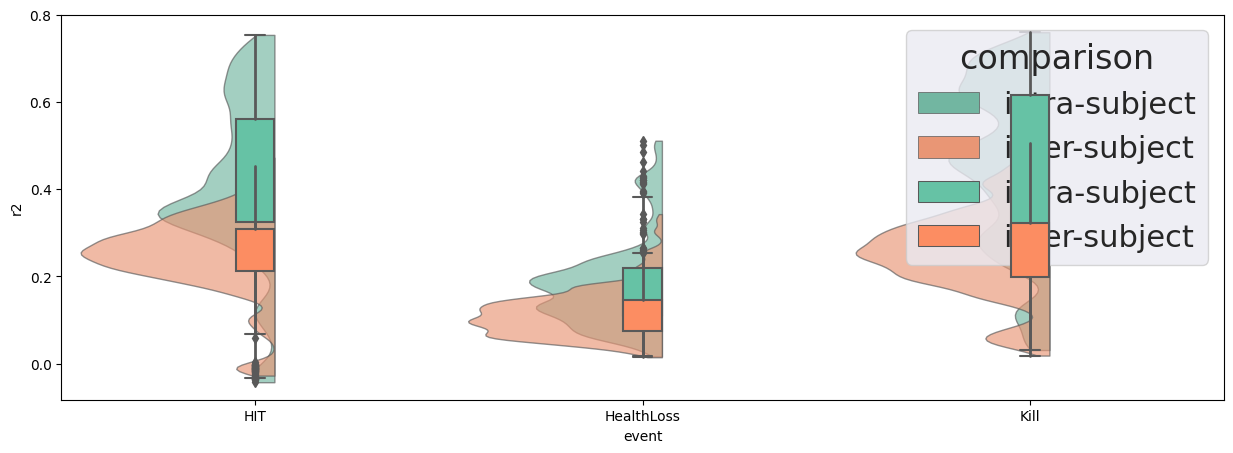